<a href="https://colab.research.google.com/github/dusanpython66/Hello-World-HK/blob/master/%C5%A0t%C4%9Bp%C3%A1nkov%C3%A1_perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Model perceptronu

## Úvod

In [ ]:
######### Zde je hlavička ################
from math import *
import sympy as sym 
from sympy.plotting import plot3d
from IPython.display import Math, display, Latex
import numpy as np
sym.init_printing()
##################################################

<IPython.core.display.Math object>

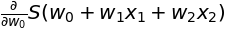

In [ ]:
from sympy import Derivative, Function, derive_by_array, latex, Lambda, symbols, summation, Sum, oo
S = Function("S")
w0, w1, w2, x1, x2, z = sym.symbols("w0 w1 w2 x1 x2 z")
j = symbols("j", integer=True)
z = w1 * x1 + w2 * x2 + w0
y = S(z)
display(Math(r"""y = %s""" %(sym.latex(y))))
display(Derivative(y, w0, evaluate=False))

## Aktivační funkce $\sigma$

<IPython.core.display.Math object>

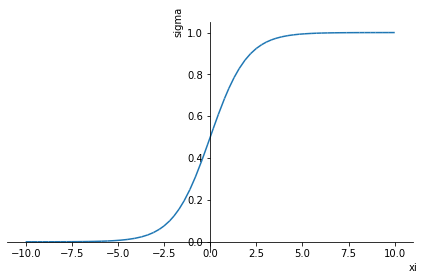

In [ ]:
# definujme tzv. aktivační funkci f
xi, x1, x2, theta, xi = sym.symbols("xi x1 x2 theta xi")
sigma = 1/(1 + sym.exp(-xi))
display(Math(r"""\sigma(\xi) = %s""" %(sym.latex(sigma))))
sym.plot(sigma, (xi, -10, 10), ylabel="sigma")

# Karolína

## Lineární separace ve 2D

### Algoritmus vah ve 2D

In [ ]:
# generujme  body:

POCET_BODU = 4
DIMENZE = 2
from random import randint
seznam_bodu = []
for i in range(POCET_BODU):
    souradnice = []
    for j in range(DIMENZE):
        x = randint(-10, 10)
        souradnice.append(x)
    seznam_bodu.append((*souradnice,))

print(f"Seznam bodů: {seznam_bodu}")
print()
print("Rodělme body do dvou skupin s příznakem 0 resp. 1.\n \
     Příznak d je čtvrtou souřadnicí.")
################## rozdělme body do dvou tříd:#####################
# modrá znamená, že čtvrtá souřadnice je rovna nule,
# červená znamená, že čtvrtá souřadnice je rovna jedné (viz seznam bodů):
for souradnice in seznam_bodu:
    ind = seznam_bodu.index(souradnice)
    if ind <= len(seznam_bodu) // 2:
        seznam_bodu[ind] = souradnice + (0,)
    else:
        seznam_bodu[ind] = souradnice + (1,)
print(seznam_bodu)
print("-"*80)

Seznam bodů: [(-2, 4), (-7, -1), (10, 7), (5, -4)]

Rodělme body do dvou skupin s příznakem 0 resp. 1.
      Příznak d je čtvrtou souřadnicí.
[(-2, 4, 0), (-7, -1, 0), (10, 7, 0), (5, -4, 1)]
--------------------------------------------------------------------------------


In [ ]:
print(seznam_bodu)
# počáteční nastavení vah:
from math import exp
w1 = 0; w2 = 0; w0 = 1; 

#seznam_bodu = [(0, 0, 0), (1, 1, 0), (1, 0, 1), (0, 1, 1)]
# nastavení hyperparametru r (anglicky: learning rate)
r = 1  # learning rate...1.parametr  (0,1>
s = len(seznam_bodu)  # počet bodů
epsilon = 0.1
chyba = epsilon 
pocet_opak = 0
while chyba >= epsilon and pocet_opak < 100:
    suma_chyb = 0
    for souradnice in seznam_bodu:
        x1 = souradnice[0]; x2 = souradnice[1];
        z = w1 * x1 + w2 * x2 + w0  # z... obecna rovnice primky
        #y = f.subs({xi:z})
        y = 1/(1 + exp(-z)) # y.....Sigmoidální přenosová funkce 
        d = souradnice[DIMENZE] # d....barva bodu
        #print(y.evalf())
        suma_chyb += abs(d - y)
        w1 = w1 + r * (d - y) * x1
        w2 = w2 + r * (d - y) * x2
        w0 = w0 + r * (d - y) 
        #print(f"w1 = {w1}, w2 = {w2}, w0 = {w0}")
    chyba = (1/s) * suma_chyb # chyba závisí na volbě parametrů w0, w1, w2
    #print(f"chyba = {chyba}")
    #print()
    pocet_opak += 1
    #print(chyba)
print("-"*80)
print("Algoritmus končí !")
print(f"w1 = {w1}, w2 = {w2}, w0 = {w0}")

[(-2, 4, 0), (-7, -1, 0), (10, 7, 0), (5, -4, 1)]
--------------------------------------------------------------------------------
Algoritmus končí !
w1 = 1.4119917195347602, w2 = -2.9671559574453985, w0 = 0.2605148073693814


### Grafické znázornění 2D

w1 = 1.4119917195347602, w2 = -2.9671559574453985, w0 = 0.2605148073693814


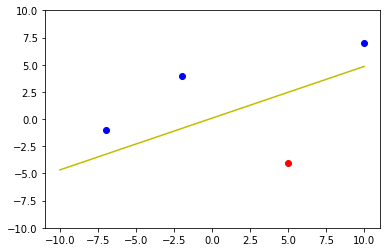

In [ ]:
print(f"w1 = {w1}, w2 = {w2}, w0 = {w0}")
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

t = np.arange(-10.0, 10.0, 0.01)
s = -(w0 + w1 * t) / w2
seznam_modrych_bodu = []
seznam_cervenych_bodu = []
for bod in seznam_bodu:
    if bod[2] == 0:
        seznam_modrych_bodu.append(bod)
    else:
        seznam_cervenych_bodu.append(bod)

plt.plot([bod[0] for bod in seznam_modrych_bodu], 
         [bod[1] for bod in seznam_modrych_bodu], "bo")
plt.plot([bod[0] for bod in seznam_cervenych_bodu], 
         [bod[1] for bod in seznam_cervenych_bodu], "ro")

plt.plot(t, s, "y")
plt.ylim(-10,10)
plt.show()

## Lineární separace ve 3D

Modifikujte předchozí algoritmus pro případ bodů v prostoru $\mathbb R^3.$
Opět uvažujte dvě množiny bodů, separační hranice bude rovina o rovnici:
\begin{equation}
w_3x_3 + w_2x_2 + w_1x_1 + w_0 = 0.
\end{equation}



### Algoritmus vah ve 3D

In [ ]:
# generujme  body:

POCET_BODU = 3
DIMENZE = 3
from random import randint
seznam_bodu = []
for i in range(POCET_BODU):
    souradnice = []
    for j in range(DIMENZE):
        x = randint(-10, 10)
        souradnice.append(x)
    seznam_bodu.append((*souradnice,))

print(f"Seznam bodů: {seznam_bodu}")
print()
print("Rodělme body do dvou skupin s příznakem 0 resp. 1.\n \
     Příznak d je čtvrtou souřadnicí.")
################## rozdělme body do dvou tříd:#####################
# modrá znamená, že čtvrtá souřadnice je rovna nule,
# červená znamená, že čtvrtá souřadnice je rovna jedné (viz seznam bodů):
for souradnice in seznam_bodu:
    ind = seznam_bodu.index(souradnice)
    if ind <= len(seznam_bodu) // 2:
        seznam_bodu[ind] = souradnice + (0,)
    else:
        seznam_bodu[ind] = souradnice + (1,)
print(seznam_bodu)
print("-"*80)


Seznam bodů: [(6, -10, 2), (9, 9, -1), (4, -2, 6)]

Rodělme body do dvou skupin s příznakem 0 resp. 1.
      Příznak d je čtvrtou souřadnicí.
[(6, -10, 2, 0), (9, 9, -1, 0), (4, -2, 6, 1)]
--------------------------------------------------------------------------------


In [ ]:
# počáteční nastavení vah:
from math import exp
w1 = 0; w2 = 0; w0 = 1; w3 = 0;

#seznam_bodu = [(0, 0, 0), (1, 1, 0), (1, 0, 1), (0, 1, 1)]
# nastavení hyperparametru r (anglicky: learning rate)
r = 1  # learning rate
s = len(seznam_bodu)  # počet bodů
epsilon = 0.1
chyba = epsilon 
pocet_opak = 0
while chyba >= epsilon and pocet_opak < 100:
    suma_chyb = 0
    for souradnice in seznam_bodu:
        x1 = souradnice[0]; x2 = souradnice[1]; x3 = souradnice[2]
        z = w1 * x1 + w2 * x2 + w3 * x3 + w0
        #y = f.subs({xi:z})
        y = 1/(1 + exp(-z)) 
        d = souradnice[DIMENZE]
        #print(y.evalf())
        suma_chyb += abs(d - y)
        w1 = w1 + r * (d - y) * x1
        w2 = w2 + r * (d - y) * x2
        w3 = w3 + r * (d - y) * x3
        w0 = w0 + r * (d - y) 
        #print(f"w1 = {w1}, w2 = {w2}, w3 = {w3}, w0 = {w0}")
    chyba = (1/s) * suma_chyb # chyba závisí na volbě parametrů w0, w1, w2,w3
    #print(f"chyba = {chyba}")
    #print()
    pocet_opak += 1
    #print(chyba)
print("-"*80)
print(seznam_bodu)
print("-"*80)
print("Algoritmus končí !")
print(f"w1 = {w1}, w2 = {w2}, w3 = {w3}, w0 = {w0}")

--------------------------------------------------------------------------------
[(6, -10, 2, 0), (9, 9, -1, 0), (4, -2, 6, 1)]
--------------------------------------------------------------------------------
Algoritmus končí !
w1 = -9.247563371545633, w2 = -3.7566396330340233, w3 = 5.748233623856275, w0 = 0.3037933486259308


### Grafické znázornění 3D

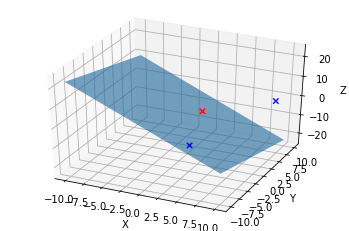

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

ax = plt.figure().add_subplot(projection='3d')


# Creating dataset
x = np.outer(np.linspace(-10, 10, 2), np.ones(2))
y = x.copy().T # transpose
z =  (w1 * x + w2 * y + w0)/w3
  

# Creating plot

ax.plot_surface(x, y, z, alpha=0.6)

seznam_x_souradnic = []
seznam_y_souradnic = []
seznam_z_souradnic = []

for souradnice in seznam_bodu:
    seznam_x_souradnic.append(souradnice[0])
    seznam_y_souradnic.append(souradnice[1]) 
    seznam_z_souradnic.append(souradnice[2]) 

xs = np.array([seznam_x_souradnic])
ys = np.array([seznam_y_souradnic])
zs = np.array([seznam_z_souradnic])
c_list = []

# By using zdir='y', the y value of these points is fixed to the zs value 0
# and the (x, y) points are plotted on the x and z axes.
ax.scatter(xs, ys, zs, marker="x",  s=30,c=['b', 'b', 'r'], depthshade=True, alpha=0.9)
#ax.scatter(xs, ys, zs, marker="x",  s=30,c=['b', 'b', 'r'], label='Body', depthshade=True, alpha=0.9)#s...zvetsuje a zmensuje body,c...urcuje barvu,
#depthshade=False..hloubkovy stin, pokud True, nic se nedeje, kdyz tam ta funkce neni, pokud False, tak i body za rovinou jsou zvyrazneny

# Make legend, set axes limits and labels
#ax.set_title("Lineární separace ve 3D") 
#ax.legend('Body')
#ax.set_xlim(-10, 10)
#ax.set_ylim(-10, 10)
#ax.set_zlim(-10, 10)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

ax.view_init(elev=35., azim=-65) #‘elev’ stores the elevation angle in the z plane. ‘azim’ stores the azimuth angle in the x,y plane.D constructor.

plt.show()
#print(seznam_bodu)